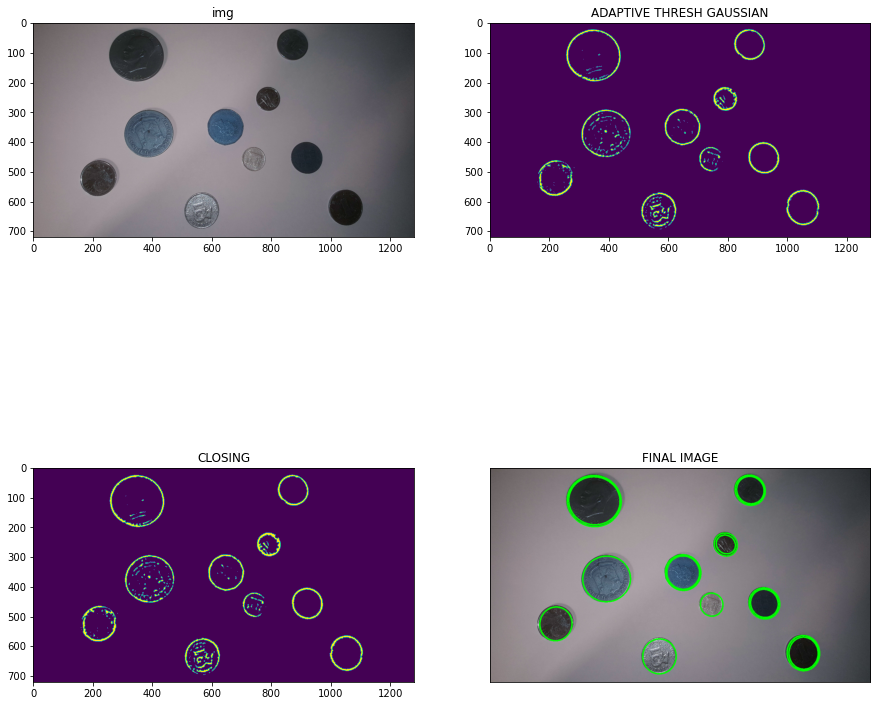

In [253]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('coin2.jpg')
img = cv2.resize(img, dsize=(1280,720))
dst = img.copy()
kernel = np.ones((2,2),np.uint8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (17, 17), 0)
th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=2)
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for i in contours:
    area = cv2.contourArea(i)
    if area < 400:
        continue
    if cv2.contourArea(i) < 6 : continue
    ellipse = cv2.fitEllipse(i)
    el_img=cv2.ellipse(img,ellipse,(0,255,0),4)


plt.figure(figsize=(15,15), facecolor='white')
plt.subplot(221),plt.imshow(dst),plt.title('img')
plt.subplot(222),plt.imshow(th),plt.title('ADAPTIVE THRESH GAUSSIAN')
plt.subplot(223),plt.imshow(closing),plt.title('CLOSING')
plt.subplot(224),plt.imshow(el_img),plt.title('FINAL IMAGE')
plt.xticks([]), plt.yticks([])

plt.show()